In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re

In [6]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

In [7]:
df= pd.read_csv('iscxIDS2012.csv')
df.head(10)

/Users/sanjitmahajan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Tag,appName,destination,destinationPayloadAsBase64,destinationPayloadAsUTF,destinationPort,destinationTCPFlagsDescription,direction,protocolName,sensorInterfaceId,source,sourceFile,sourcePayloadAsBase64,sourcePayloadAsUTF,sourcePort,sourceTCPFlagsDescription,startDateTime,startTime,stopDateTime,totalDestinationBytes,totalDestinationPackets,totalSourceBytes,totalSourcePackets
0,Normal,Unknown_UDP,224.0.0.251,NaN,NaN,5353.0,NaN,L2R,udp_ip,NaN,192.168.5.122,TestbedMonJun14Flows.xml,NaN,NaN,5353.0,NaN,2010-06-13T23:57:19,NaN,2010-06-14T00:11:23,0,0,16076,178
1,Normal,HTTPImageTransfer,206.217.198.186,NaN,NaN,80.0,NaN,L2R,tcp_ip,NaN,192.168.2.111,TestbedMonJun14Flows.xml,NaN,NaN,4435.0,"F,A",2010-06-13T23:58:23,NaN,2010-06-14T00:01:24,0,0,384,6
2,Normal,DNS,192.168.5.122,NaN,NaN,53.0,NaN,L2L,udp_ip,NaN,192.168.4.119,TestbedMonJun14Flows.xml,NaN,NaN,4428.0,NaN,2010-06-13T23:58:31,NaN,2010-06-13T23:59:25,642,4,171,2
3,Normal,HTTPImageTransfer,219.94.203.105,NaN,NaN,80.0,NaN,L2R,tcp_ip,NaN,192.168.4.119,TestbedMonJun14Flows.xml,NaN,NaN,3639.0,"F,A",2010-06-13T23:58:31,NaN,2010-06-14T00:00:58,0,0,384,6
4,Normal,HTTPImageTransfer,98.137.80.50,NaN,NaN,80.0,R,L2R,tcp_ip,NaN,192.168.4.119,TestbedMonJun14Flows.xml,NaN,NaN,3641.0,"F,P,A",2010-06-13T23:58:31,NaN,2010-06-13T23:59:26,128,2,186,2
5,Normal,HTTPImageTransfer,142.166.14.86,NaN,NaN,80.0,"F,P,A",L2R,tcp_ip,NaN,192.168.4.119,TestbedMonJun14Flows.xml,NaN,NaN,3642.0,"F,P,A",2010-06-13T23:58:32,NaN,2010-06-14T00:01:07,1476,2,331,4
6,Normal,HTTPWeb,59.106.19.74,NaN,NaN,80.0,NaN,L2R,tcp_ip,NaN,192.168.2.109,TestbedMonJun14Flows.xml,NaN,NaN,1523.0,R,2010-06-13T23:58:32,NaN,2010-06-13T23:59:58,0,0,64,1
7,Normal,SecureWeb,209.87.178.183,NaN,NaN,443.0,"F,A",L2R,tcp_ip,NaN,192.168.4.121,TestbedMonJun14Flows.xml,NaN,NaN,52031.0,"F,A",2010-06-13T23:58:35,NaN,2010-06-14T00:00:15,128,2,128,2
8,Normal,HTTPWeb,208.89.13.133,NaN,NaN,80.0,"F,A",L2R,tcp_ip,NaN,192.168.4.121,TestbedMonJun14Flows.xml,NaN,NaN,52032.0,"F,A",2010-06-13T23:58:36,NaN,2010-06-14T00:00:16,128,2,128,2
9,Normal,Unknown_UDP,0.0.0.0,NaN,NaN,547.0,NaN,R2R,udp_ip,NaN,0.0.0.0,TestbedMonJun14Flows.xml,NaN,NaN,546.0,NaN,2010-06-13T23:58:51,NaN,2010-06-13T23:59:54,465,3,0,0


In [104]:
df.sourceFile.value_counts()

TestbedSunJun13Flows.xml      275528
TestbedWedJun16-3Flows.xml    196924
TestbedTueJun15-3Flows.xml    196034
TestbedTueJun15-1Flows.xml    192041
TestbedTueJun15-2Flows.xml    183623
TestbedWedJun16-1Flows.xml    182968
TestbedMonJun14Flows.xml      171380
TestbedThuJun17-2Flows.xml    149625
TestbedThuJun17-1Flows.xml    142534
TestbedWedJun16-2Flows.xml    142371
TestbedSatJun12Flows.xml      133193
TestbedThuJun17-3Flows.xml     61832
Name: sourceFile, dtype: int64

In [108]:
protocols = df.protocolName.value_counts().head(3).index.values
idx = np.arange(len(protocols))
protocol_map = {}
for name,i in zip(protocols,idx):
    protocol_map[name]=i
protocol_map

{'tcp_ip': 0, 'udp_ip': 1, 'icmp_ip': 2}

In [109]:
df['protocolName_'] = df['protocolName'].apply(lambda name: protocol_map[name] if name in protocol_map.keys() else 3)
df.protocolName_.value_counts()

0    1605779
1     413985
2       8149
3        141
Name: protocolName_, dtype: int64

In [110]:
top10App = df.appName.value_counts().sort_values(ascending=False).head(10).index.values

In [111]:
df['appTop'] = df['appName'].apply(lambda name: name if name in top10App else 'Other' )
df.head(3)

,Tag,appName,destination,destinationPayloadAsBase64,destinationPayloadAsUTF,destinationPort,destinationTCPFlagsDescription,direction,protocolName,sensorInterfaceId,source,sourceFile,sourcePayloadAsBase64,sourcePayloadAsUTF,sourcePort,sourceTCPFlagsDescription,startDateTime,startTime,stopDateTime,totalDestinationBytes,totalDestinationPackets,totalSourceBytes,totalSourcePackets,protocolName_,appTop
0,Normal,Unknown_UDP,224.0.0.251,NaN,NaN,5353.0,NaN,L2R,udp_ip,NaN,192.168.5.122,TestbedMonJun14Flows.xml,NaN,NaN,5353.0,NaN,2010-06-13T23:57:19,NaN,2010-06-14T00:11:23,0,0,16076,178,1,Unknown_UDP
1,Normal,HTTPImageTransfer,206.217.198.186,NaN,NaN,80.0,NaN,L2R,tcp_ip,NaN,192.168.2.111,TestbedMonJun14Flows.xml,NaN,NaN,4435.0,"F,A",2010-06-13T23:58:23,NaN,2010-06-14T00:01:24,0,0,384,6,0,HTTPImageTransfer
2,Normal,DNS,192.168.5.122,NaN,NaN,53.0,NaN,L2L,udp_ip,NaN,192.168.4.119,TestbedMonJun14Flows.xml,NaN,NaN,4428.0,NaN,2010-06-13T23:58:31,NaN,2010-06-13T23:59:25,642,4,171,2,1,DNS


In [113]:
df.appTop.value_counts()

HTTPWeb               721503
HTTPImageTransfer     707631
DNS                   309359
Other                  65143
Unknown_UDP            62669
SecureWeb              56456
NetBIOS-IP             28969
Unknown_TCP            28568
WindowsFileSharing     17848
POP                    16270
IMAP                   13638
Name: appTop, dtype: int64

In [114]:
df.isnull().sum()/len(df)*100

Tag                                0.000049
appName                            0.000000
destination                        0.000049
destinationPayloadAsBase64        57.414201
destinationPayloadAsUTF           57.416962
destinationPort                    0.000049
destinationTCPFlagsDescription    24.024804
direction                          0.000000
protocolName                       0.000049
sensorInterfaceId                 90.530775
source                             0.000049
sourceFile                         0.000049
sourcePayloadAsBase64             52.967623
sourcePayloadAsUTF                57.149169
sourcePort                         0.000049
sourceTCPFlagsDescription         20.982577
startDateTime                      0.000049
startTime                         90.978149
stopDateTime                       0.000049
totalDestinationBytes              0.000000
totalDestinationPackets            0.000000
totalSourceBytes                   0.000000
totalSourcePackets              

In [11]:
df.drop(df[df.source.isnull()].index[0],axis=0,inplace=True)

In [12]:
df.isnull().sum()/len(df)*100

Tag                                0.000000
appName                            0.000000
destination                        0.000000
destinationPayloadAsBase64        57.414229
destinationPayloadAsUTF           57.416991
destinationPort                    0.000000
destinationTCPFlagsDescription    24.024767
direction                          0.000000
protocolName                       0.000000
sensorInterfaceId                 90.530770
source                             0.000000
sourceFile                         0.000000
sourcePayloadAsBase64             52.967649
sourcePayloadAsUTF                57.149197
sourcePort                         0.000000
sourceTCPFlagsDescription         20.982538
startDateTime                      0.000000
startTime                         90.978145
stopDateTime                       0.000000
totalDestinationBytes              0.000000
totalDestinationPackets            0.000000
totalSourceBytes                   0.000000
totalSourcePackets              

### Label encoding for AppName

In [13]:
classes = df['appTop'].value_counts().index.values
idx = np.arange(len(classes))
d = {}
for name,i in zip(classes,idx):
    d[name]=i
d

{'HTTPWeb': 0,
 'HTTPImageTransfer': 1,
 'DNS': 2,
 'Other': 3,
 'Unknown_UDP': 4,
 'SecureWeb': 5,
 'NetBIOS-IP': 6,
 'Unknown_TCP': 7,
 'WindowsFileSharing': 8,
 'POP': 9,
 'IMAP': 10}

In [14]:
df['appName_'] = df['appTop'].apply(lambda name: d[name])
df.head()

,Tag,appName,destination,destinationPayloadAsBase64,destinationPayloadAsUTF,destinationPort,destinationTCPFlagsDescription,direction,protocolName,sensorInterfaceId,source,sourceFile,sourcePayloadAsBase64,sourcePayloadAsUTF,sourcePort,sourceTCPFlagsDescription,startDateTime,startTime,stopDateTime,totalDestinationBytes,totalDestinationPackets,totalSourceBytes,totalSourcePackets,protocolName_,appTop,appName_
0,Normal,Unknown_UDP,224.0.0.251,NaN,NaN,5353.0,NaN,L2R,udp_ip,NaN,192.168.5.122,TestbedMonJun14Flows.xml,NaN,NaN,5353.0,NaN,2010-06-13T23:57:19,NaN,2010-06-14T00:11:23,0,0,16076,178,1,Unknown_UDP,4
1,Normal,HTTPImageTransfer,206.217.198.186,NaN,NaN,80.0,NaN,L2R,tcp_ip,NaN,192.168.2.111,TestbedMonJun14Flows.xml,NaN,NaN,4435.0,"F,A",2010-06-13T23:58:23,NaN,2010-06-14T00:01:24,0,0,384,6,0,HTTPImageTransfer,1
2,Normal,DNS,192.168.5.122,NaN,NaN,53.0,NaN,L2L,udp_ip,NaN,192.168.4.119,TestbedMonJun14Flows.xml,NaN,NaN,4428.0,NaN,2010-06-13T23:58:31,NaN,2010-06-13T23:59:25,642,4,171,2,1,DNS,2
3,Normal,HTTPImageTransfer,219.94.203.105,NaN,NaN,80.0,NaN,L2R,tcp_ip,NaN,192.168.4.119,TestbedMonJun14Flows.xml,NaN,NaN,3639.0,"F,A",2010-06-13T23:58:31,NaN,2010-06-14T00:00:58,0,0,384,6,0,HTTPImageTransfer,1
4,Normal,HTTPImageTransfer,98.137.80.50,NaN,NaN,80.0,R,L2R,tcp_ip,NaN,192.168.4.119,TestbedMonJun14Flows.xml,NaN,NaN,3641.0,"F,P,A",2010-06-13T23:58:31,NaN,2010-06-13T23:59:26,128,2,186,2,0,HTTPImageTransfer,1


In [15]:
df.appName_.value_counts()

0     721502
1     707631
2     309359
3      65143
4      62669
5      56456
6      28969
7      28568
8      17848
9      16270
10     13638
Name: appName_, dtype: int64

In [16]:
df.corr()['appName_']*100

destinationPort             32.741636
sensorInterfaceId                 NaN
sourcePort                  17.289445
startTime                   -6.681622
totalDestinationBytes       -1.344550
totalDestinationPackets     -1.115903
totalSourceBytes             0.052849
totalSourcePackets          -0.872089
appName_                   100.000000
Name: appName_, dtype: float64

#### Tasks to do
1. Make duration column
2. Make Pay len column


#### 1. DURATION COLUMN

In [17]:
df.head()

,Tag,appName,destination,destinationPayloadAsBase64,destinationPayloadAsUTF,destinationPort,destinationTCPFlagsDescription,direction,protocolName,sensorInterfaceId,source,sourceFile,sourcePayloadAsBase64,sourcePayloadAsUTF,sourcePort,sourceTCPFlagsDescription,startDateTime,startTime,stopDateTime,totalDestinationBytes,totalDestinationPackets,totalSourceBytes,totalSourcePackets,protocolName_,appTop,appName_
0,Normal,Unknown_UDP,224.0.0.251,NaN,NaN,5353.0,NaN,L2R,udp_ip,NaN,192.168.5.122,TestbedMonJun14Flows.xml,NaN,NaN,5353.0,NaN,2010-06-13T23:57:19,NaN,2010-06-14T00:11:23,0,0,16076,178,1,Unknown_UDP,4
1,Normal,HTTPImageTransfer,206.217.198.186,NaN,NaN,80.0,NaN,L2R,tcp_ip,NaN,192.168.2.111,TestbedMonJun14Flows.xml,NaN,NaN,4435.0,"F,A",2010-06-13T23:58:23,NaN,2010-06-14T00:01:24,0,0,384,6,0,HTTPImageTransfer,1
2,Normal,DNS,192.168.5.122,NaN,NaN,53.0,NaN,L2L,udp_ip,NaN,192.168.4.119,TestbedMonJun14Flows.xml,NaN,NaN,4428.0,NaN,2010-06-13T23:58:31,NaN,2010-06-13T23:59:25,642,4,171,2,1,DNS,2
3,Normal,HTTPImageTransfer,219.94.203.105,NaN,NaN,80.0,NaN,L2R,tcp_ip,NaN,192.168.4.119,TestbedMonJun14Flows.xml,NaN,NaN,3639.0,"F,A",2010-06-13T23:58:31,NaN,2010-06-14T00:00:58,0,0,384,6,0,HTTPImageTransfer,1
4,Normal,HTTPImageTransfer,98.137.80.50,NaN,NaN,80.0,R,L2R,tcp_ip,NaN,192.168.4.119,TestbedMonJun14Flows.xml,NaN,NaN,3641.0,"F,P,A",2010-06-13T23:58:31,NaN,2010-06-13T23:59:26,128,2,186,2,0,HTTPImageTransfer,1


In [18]:
import datetime as dt
import re

In [19]:
df['startDT'] = df['startDateTime'].apply(lambda date: date.replace('T',' ') if pd.notnull(date) else date)
df['startDT'] = df['startDT'].apply(lambda date:  dt.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') if pd.notnull(date) else date)
df['stopDT'] = df['stopDateTime'].apply(lambda date: date.replace('T',' ') if pd.notnull(date) else date)
df['stopDT'] = df['stopDT'].apply(lambda date:  dt.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') if pd.notnull(date) else date)
df.head()

,Tag,appName,destination,destinationPayloadAsBase64,destinationPayloadAsUTF,destinationPort,destinationTCPFlagsDescription,direction,protocolName,sensorInterfaceId,source,sourceFile,sourcePayloadAsBase64,sourcePayloadAsUTF,sourcePort,sourceTCPFlagsDescription,startDateTime,startTime,stopDateTime,totalDestinationBytes,totalDestinationPackets,totalSourceBytes,totalSourcePackets,protocolName_,appTop,appName_,startDT,stopDT
0,Normal,Unknown_UDP,224.0.0.251,NaN,NaN,5353.0,NaN,L2R,udp_ip,NaN,192.168.5.122,TestbedMonJun14Flows.xml,NaN,NaN,5353.0,NaN,2010-06-13T23:57:19,NaN,2010-06-14T00:11:23,0,0,16076,178,1,Unknown_UDP,4,2010-06-13 23:57:19,2010-06-14 00:11:23
1,Normal,HTTPImageTransfer,206.217.198.186,NaN,NaN,80.0,NaN,L2R,tcp_ip,NaN,192.168.2.111,TestbedMonJun14Flows.xml,NaN,NaN,4435.0,"F,A",2010-06-13T23:58:23,NaN,2010-06-14T00:01:24,0,0,384,6,0,HTTPImageTransfer,1,2010-06-13 23:58:23,2010-06-14 00:01:24
2,Normal,DNS,192.168.5.122,NaN,NaN,53.0,NaN,L2L,udp_ip,NaN,192.168.4.119,TestbedMonJun14Flows.xml,NaN,NaN,4428.0,NaN,2010-06-13T23:58:31,NaN,2010-06-13T23:59:25,642,4,171,2,1,DNS,2,2010-06-13 23:58:31,2010-06-13 23:59:25
3,Normal,HTTPImageTransfer,219.94.203.105,NaN,NaN,80.0,NaN,L2R,tcp_ip,NaN,192.168.4.119,TestbedMonJun14Flows.xml,NaN,NaN,3639.0,"F,A",2010-06-13T23:58:31,NaN,2010-06-14T00:00:58,0,0,384,6,0,HTTPImageTransfer,1,2010-06-13 23:58:31,2010-06-14 00:00:58
4,Normal,HTTPImageTransfer,98.137.80.50,NaN,NaN,80.0,R,L2R,tcp_ip,NaN,192.168.4.119,TestbedMonJun14Flows.xml,NaN,NaN,3641.0,"F,P,A",2010-06-13T23:58:31,NaN,2010-06-13T23:59:26,128,2,186,2,0,HTTPImageTransfer,1,2010-06-13 23:58:31,2010-06-13 23:59:26


In [20]:
def format_datetime(date_time):
    print(date_time)
    if pd.isnull(date_time):
        return 0,0,0,0,0,0 
    return date_time.year,date_time.month,date_time.day,date_time.hour,date_time.minute,date_time.second

In [21]:
def diff(date_time):
    year = date_time[0].year - date_time[1].year
    month = date_time[0].month - date_time[1].month
    day = date_time[0].day - date_time[1].day
    hour = date_time[0].hour - date_time[1].hour
    minute = date_time[0].minute - date_time[1].minute
    second = date_time[0].second - date_time[1].second
    result = year*365*24*60*60 + month*30*24*60*60 + day*24*60*60 + hour*60*60 + minute*60 + second
    return result

In [22]:
%time
df['duration'] = df[['stopDT','startDT']].apply(diff,axis=1)
df.head()

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


,Tag,appName,destination,destinationPayloadAsBase64,destinationPayloadAsUTF,destinationPort,destinationTCPFlagsDescription,direction,protocolName,sensorInterfaceId,source,sourceFile,sourcePayloadAsBase64,sourcePayloadAsUTF,sourcePort,sourceTCPFlagsDescription,startDateTime,startTime,stopDateTime,totalDestinationBytes,totalDestinationPackets,totalSourceBytes,totalSourcePackets,protocolName_,appTop,appName_,startDT,stopDT,duration
0,Normal,Unknown_UDP,224.0.0.251,NaN,NaN,5353.0,NaN,L2R,udp_ip,NaN,192.168.5.122,TestbedMonJun14Flows.xml,NaN,NaN,5353.0,NaN,2010-06-13T23:57:19,NaN,2010-06-14T00:11:23,0,0,16076,178,1,Unknown_UDP,4,2010-06-13 23:57:19,2010-06-14 00:11:23,844
1,Normal,HTTPImageTransfer,206.217.198.186,NaN,NaN,80.0,NaN,L2R,tcp_ip,NaN,192.168.2.111,TestbedMonJun14Flows.xml,NaN,NaN,4435.0,"F,A",2010-06-13T23:58:23,NaN,2010-06-14T00:01:24,0,0,384,6,0,HTTPImageTransfer,1,2010-06-13 23:58:23,2010-06-14 00:01:24,181
2,Normal,DNS,192.168.5.122,NaN,NaN,53.0,NaN,L2L,udp_ip,NaN,192.168.4.119,TestbedMonJun14Flows.xml,NaN,NaN,4428.0,NaN,2010-06-13T23:58:31,NaN,2010-06-13T23:59:25,642,4,171,2,1,DNS,2,2010-06-13 23:58:31,2010-06-13 23:59:25,54
3,Normal,HTTPImageTransfer,219.94.203.105,NaN,NaN,80.0,NaN,L2R,tcp_ip,NaN,192.168.4.119,TestbedMonJun14Flows.xml,NaN,NaN,3639.0,"F,A",2010-06-13T23:58:31,NaN,2010-06-14T00:00:58,0,0,384,6,0,HTTPImageTransfer,1,2010-06-13 23:58:31,2010-06-14 00:00:58,147
4,Normal,HTTPImageTransfer,98.137.80.50,NaN,NaN,80.0,R,L2R,tcp_ip,NaN,192.168.4.119,TestbedMonJun14Flows.xml,NaN,NaN,3641.0,"F,P,A",2010-06-13T23:58:31,NaN,2010-06-13T23:59:26,128,2,186,2,0,HTTPImageTransfer,1,2010-06-13 23:58:31,2010-06-13 23:59:26,55


In [23]:
df.corr()['appName_'].sort_values(ascending=False)*100

appName_                   100.000000
destinationPort             32.741636
sourcePort                  17.289445
duration                     7.945890
totalSourceBytes             0.052849
totalSourcePackets          -0.872089
totalDestinationPackets     -1.115903
totalDestinationBytes       -1.344550
startTime                   -6.681622
sensorInterfaceId                 NaN
Name: appName_, dtype: float64

<AxesSubplot:xlabel='appTop', ylabel='duration'>

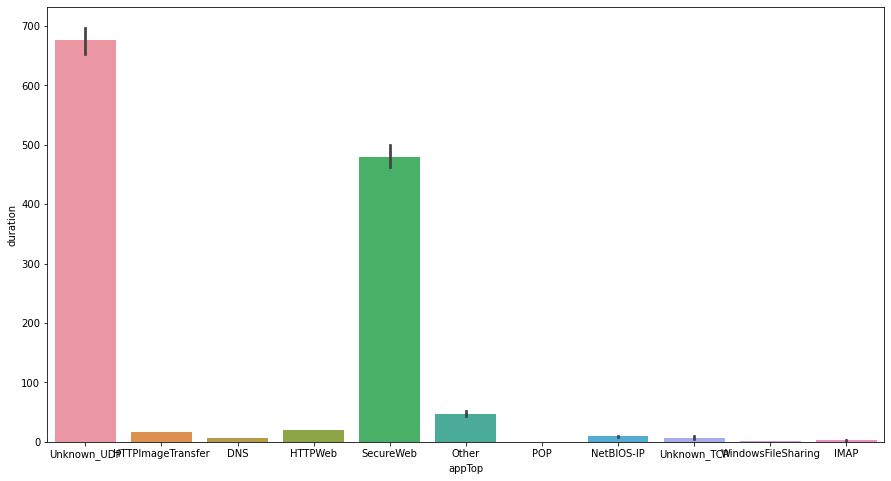

In [24]:
plt.figure(figsize=(15,8))
sns.barplot(x='appTop',y='duration',data=df)

<AxesSubplot:xlabel='appTop', ylabel='duration'>

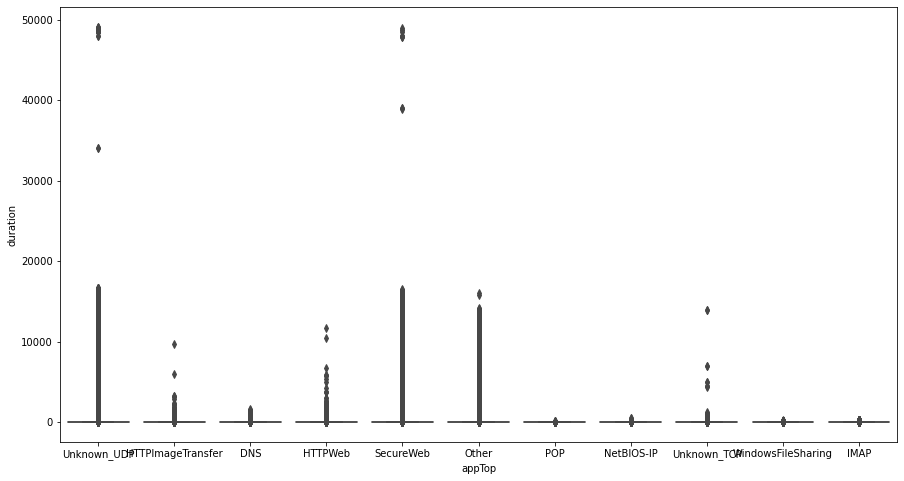

In [25]:
plt.figure(figsize=(15,8))
sns.boxplot(x='appTop',y='duration',data=df)

In [28]:
df.groupby('appTop').describe()['duration']

,count,mean,std,min,25%,50%,75%,max
appTop,,,,,,,,
DNS,309359.0,6.405859,37.027901,0.0,0.0,0.0,1.0,1648.0
HTTPImageTransfer,707631.0,17.322951,48.325446,0.0,1.0,2.0,8.0,9734.0
HTTPWeb,721502.0,20.387306,57.899010,0.0,1.0,2.0,13.0,11740.0
IMAP,13638.0,2.354597,16.022545,0.0,0.0,0.0,0.0,241.0
NetBIOS-IP,28969.0,9.204218,22.165875,0.0,0.0,0.0,1.0,540.0
Other,65143.0,46.920007,562.390249,0.0,0.0,0.0,4.0,16031.0
POP,16270.0,0.215120,1.631545,0.0,0.0,0.0,0.0,95.0
SecureWeb,56456.0,479.620820,2224.976795,0.0,1.0,3.0,31.0,48951.0
Unknown_TCP,28568.0,7.187377,145.485733,0.0,0.0,0.0,9.0,13931.0


In [29]:
df['Tag_'] = df.Tag.apply(lambda tag: 1. if tag=='Attack' else 0)
df.head()

,Tag,appName,destination,destinationPayloadAsBase64,destinationPayloadAsUTF,destinationPort,destinationTCPFlagsDescription,direction,protocolName,sensorInterfaceId,source,sourceFile,sourcePayloadAsBase64,sourcePayloadAsUTF,sourcePort,sourceTCPFlagsDescription,startDateTime,startTime,stopDateTime,totalDestinationBytes,totalDestinationPackets,totalSourceBytes,totalSourcePackets,protocolName_,appTop,appName_,startDT,stopDT,duration,Tag_
0,Normal,Unknown_UDP,224.0.0.251,NaN,NaN,5353.0,NaN,L2R,udp_ip,NaN,192.168.5.122,TestbedMonJun14Flows.xml,NaN,NaN,5353.0,NaN,2010-06-13T23:57:19,NaN,2010-06-14T00:11:23,0,0,16076,178,1,Unknown_UDP,4,2010-06-13 23:57:19,2010-06-14 00:11:23,844,0.0
1,Normal,HTTPImageTransfer,206.217.198.186,NaN,NaN,80.0,NaN,L2R,tcp_ip,NaN,192.168.2.111,TestbedMonJun14Flows.xml,NaN,NaN,4435.0,"F,A",2010-06-13T23:58:23,NaN,2010-06-14T00:01:24,0,0,384,6,0,HTTPImageTransfer,1,2010-06-13 23:58:23,2010-06-14 00:01:24,181,0.0
2,Normal,DNS,192.168.5.122,NaN,NaN,53.0,NaN,L2L,udp_ip,NaN,192.168.4.119,TestbedMonJun14Flows.xml,NaN,NaN,4428.0,NaN,2010-06-13T23:58:31,NaN,2010-06-13T23:59:25,642,4,171,2,1,DNS,2,2010-06-13 23:58:31,2010-06-13 23:59:25,54,0.0
3,Normal,HTTPImageTransfer,219.94.203.105,NaN,NaN,80.0,NaN,L2R,tcp_ip,NaN,192.168.4.119,TestbedMonJun14Flows.xml,NaN,NaN,3639.0,"F,A",2010-06-13T23:58:31,NaN,2010-06-14T00:00:58,0,0,384,6,0,HTTPImageTransfer,1,2010-06-13 23:58:31,2010-06-14 00:00:58,147,0.0
4,Normal,HTTPImageTransfer,98.137.80.50,NaN,NaN,80.0,R,L2R,tcp_ip,NaN,192.168.4.119,TestbedMonJun14Flows.xml,NaN,NaN,3641.0,"F,P,A",2010-06-13T23:58:31,NaN,2010-06-13T23:59:26,128,2,186,2,0,HTTPImageTransfer,1,2010-06-13 23:58:31,2010-06-13 23:59:26,55,0.0


In [30]:
df.Tag_.value_counts()

0.0    1959143
1.0      68910
Name: Tag_, dtype: int64

In [31]:
df.corr()['Tag_'].sort_values(ascending=False)*100

Tag_                       100.000000
appName_                     7.187864
sourcePort                   6.095821
totalDestinationPackets      1.416137
destinationPort              1.157624
totalDestinationBytes        0.902799
totalSourcePackets           0.855696
startTime                    0.300196
totalSourceBytes             0.097952
duration                    -1.393266
sensorInterfaceId                 NaN
Name: Tag_, dtype: float64

In [32]:
df['Tag'] = df['Tag'].apply(lambda tag: 1 if tag =="Attack" else 0)
df.head(2)

,Tag,appName,destination,destinationPayloadAsBase64,destinationPayloadAsUTF,destinationPort,destinationTCPFlagsDescription,direction,protocolName,sensorInterfaceId,source,sourceFile,sourcePayloadAsBase64,sourcePayloadAsUTF,sourcePort,sourceTCPFlagsDescription,startDateTime,startTime,stopDateTime,totalDestinationBytes,totalDestinationPackets,totalSourceBytes,totalSourcePackets,protocolName_,appTop,appName_,startDT,stopDT,duration,Tag_
0,0,Unknown_UDP,224.0.0.251,NaN,NaN,5353.0,NaN,L2R,udp_ip,NaN,192.168.5.122,TestbedMonJun14Flows.xml,NaN,NaN,5353.0,NaN,2010-06-13T23:57:19,NaN,2010-06-14T00:11:23,0,0,16076,178,1,Unknown_UDP,4,2010-06-13 23:57:19,2010-06-14 00:11:23,844,0.0
1,0,HTTPImageTransfer,206.217.198.186,NaN,NaN,80.0,NaN,L2R,tcp_ip,NaN,192.168.2.111,TestbedMonJun14Flows.xml,NaN,NaN,4435.0,"F,A",2010-06-13T23:58:23,NaN,2010-06-14T00:01:24,0,0,384,6,0,HTTPImageTransfer,1,2010-06-13 23:58:23,2010-06-14 00:01:24,181,0.0


#### 2. Pay Len columns

In [33]:
for x in df.Tag.value_counts():
    print(x/len(df)*100)

96.60215980548831
3.397840194511682


In [34]:
for x in df[df.destinationPayloadAsBase64.isnull()].Tag.value_counts():
    print(x/len(df)*100)

55.896418880571666
1.51781043197589


In [35]:
df['destPayLenUTF'] = df['destinationPayloadAsUTF'].apply(lambda x : len(x) if pd.notnull(x) else x)
df['sourcePayLenUTF'] = df['sourcePayloadAsUTF'].apply(lambda x : len(x) if pd.notnull(x) else x)

In [36]:
df.corr()['sourcePayLenUTF'].sort_values(ascending=False)*100

sourcePayLenUTF            100.000000
Tag                         72.779399
Tag_                        72.779399
destPayLenUTF               47.979172
duration                     8.277653
totalDestinationPackets      5.947124
totalSourcePackets           5.901788
totalSourceBytes             5.051833
totalDestinationBytes        4.730869
startTime                    1.886619
destinationPort             -2.689254
appName_                   -17.545453
sourcePort                 -19.329279
sensorInterfaceId                 NaN
Name: sourcePayLenUTF, dtype: float64

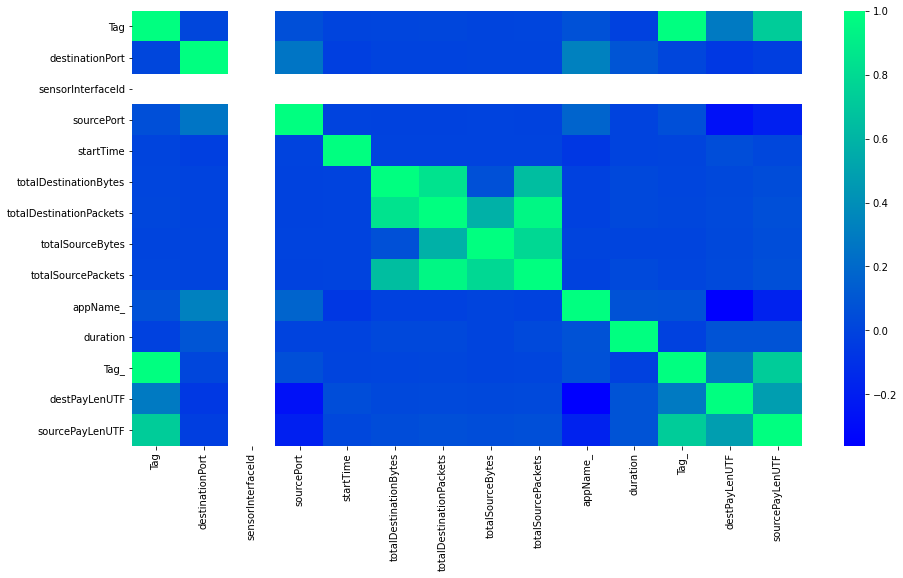

In [37]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),cmap='winter');

<AxesSubplot:xlabel='appTop', ylabel='sourcePayLenUTF'>

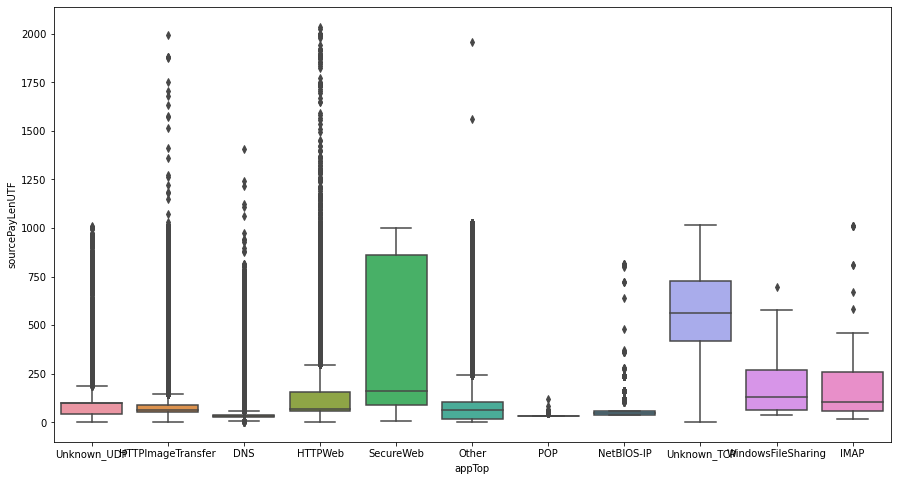

In [38]:
plt.figure(figsize=(15,8))
sns.boxplot(x='appTop',y='sourcePayLenUTF',data=df)

<AxesSubplot:xlabel='appTop', ylabel='destPayLenUTF'>

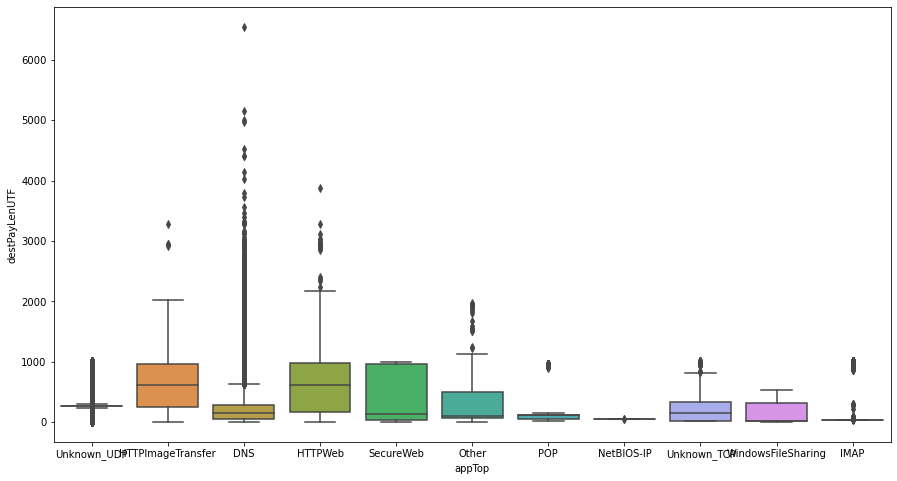

In [39]:
plt.figure(figsize=(15,8))
sns.boxplot(x='appTop',y='destPayLenUTF',data=df)

In [40]:
df[['s1','s2','s3','s4']] = df.source.str.split('.',expand=True)

In [41]:
df[['d1','d2','d3','d4']] = df.destination.str.split('.',expand=True)

### Remove unnecessary columns

In [73]:
df1 = df.copy()

In [74]:
df1.drop(columns=['startTime','sensorInterfaceId','destinationPayloadAsUTF','destinationPayloadAsBase64','sourcePayloadAsUTF','sourcePayloadAsBase64'],axis=1,inplace=True)
df1.head(2)

,Tag,appName,destination,destinationPort,destinationTCPFlagsDescription,direction,protocolName,source,sourceFile,sourcePort,sourceTCPFlagsDescription,startDateTime,stopDateTime,totalDestinationBytes,totalDestinationPackets,totalSourceBytes,totalSourcePackets,protocolName_,appTop,appName_,startDT,stopDT,duration,Tag_,destPayLenUTF,sourcePayLenUTF,s1,s2,s3,s4,d1,d2,d3,d4
0,0,Unknown_UDP,224.0.0.251,5353.0,NaN,L2R,udp_ip,192.168.5.122,TestbedMonJun14Flows.xml,5353.0,NaN,2010-06-13T23:57:19,2010-06-14T00:11:23,0,0,16076,178,1,Unknown_UDP,4,2010-06-13 23:57:19,2010-06-14 00:11:23,844,0.0,NaN,NaN,192,168,5,122,224,0,0,251
1,0,HTTPImageTransfer,206.217.198.186,80.0,NaN,L2R,tcp_ip,192.168.2.111,TestbedMonJun14Flows.xml,4435.0,"F,A",2010-06-13T23:58:23,2010-06-14T00:01:24,0,0,384,6,0,HTTPImageTransfer,1,2010-06-13 23:58:23,2010-06-14 00:01:24,181,0.0,NaN,NaN,192,168,2,111,206,217,198,186


In [75]:
df1.drop(columns=['Tag','appName','sourcePort','startDateTime','stopDateTime','startDT','stopDT','destination','source'],axis=1,inplace=True)
df1.head(2)

,destinationPort,destinationTCPFlagsDescription,direction,protocolName,sourceFile,sourceTCPFlagsDescription,totalDestinationBytes,totalDestinationPackets,totalSourceBytes,totalSourcePackets,protocolName_,appTop,appName_,duration,Tag_,destPayLenUTF,sourcePayLenUTF,s1,s2,s3,s4,d1,d2,d3,d4
0,5353.0,NaN,L2R,udp_ip,TestbedMonJun14Flows.xml,NaN,0,0,16076,178,1,Unknown_UDP,4,844,0.0,NaN,NaN,192,168,5,122,224,0,0,251
1,80.0,NaN,L2R,tcp_ip,TestbedMonJun14Flows.xml,"F,A",0,0,384,6,0,HTTPImageTransfer,1,181,0.0,NaN,NaN,192,168,2,111,206,217,198,186


### Removing / Imputing missing values

In [76]:
(df1.isnull().sum()/len(df1)*100).sort_values(ascending=False)

destPayLenUTF                     57.416991
sourcePayLenUTF                   57.149197
destinationTCPFlagsDescription    24.024767
sourceTCPFlagsDescription         20.982538
destinationPort                    0.000000
Tag_                               0.000000
d3                                 0.000000
d2                                 0.000000
d1                                 0.000000
s4                                 0.000000
s3                                 0.000000
s2                                 0.000000
s1                                 0.000000
appName_                           0.000000
duration                           0.000000
appTop                             0.000000
protocolName_                      0.000000
totalSourcePackets                 0.000000
totalSourceBytes                   0.000000
totalDestinationPackets            0.000000
totalDestinationBytes              0.000000
sourceFile                         0.000000
protocolName                    

In [77]:
df1.head()

,destinationPort,destinationTCPFlagsDescription,direction,protocolName,sourceFile,sourceTCPFlagsDescription,totalDestinationBytes,totalDestinationPackets,totalSourceBytes,totalSourcePackets,protocolName_,appTop,appName_,duration,Tag_,destPayLenUTF,sourcePayLenUTF,s1,s2,s3,s4,d1,d2,d3,d4
0,5353.0,NaN,L2R,udp_ip,TestbedMonJun14Flows.xml,NaN,0,0,16076,178,1,Unknown_UDP,4,844,0.0,NaN,NaN,192,168,5,122,224,0,0,251
1,80.0,NaN,L2R,tcp_ip,TestbedMonJun14Flows.xml,"F,A",0,0,384,6,0,HTTPImageTransfer,1,181,0.0,NaN,NaN,192,168,2,111,206,217,198,186
2,53.0,NaN,L2L,udp_ip,TestbedMonJun14Flows.xml,NaN,642,4,171,2,1,DNS,2,54,0.0,NaN,NaN,192,168,4,119,192,168,5,122
3,80.0,NaN,L2R,tcp_ip,TestbedMonJun14Flows.xml,"F,A",0,0,384,6,0,HTTPImageTransfer,1,147,0.0,NaN,NaN,192,168,4,119,219,94,203,105
4,80.0,R,L2R,tcp_ip,TestbedMonJun14Flows.xml,"F,P,A",128,2,186,2,0,HTTPImageTransfer,1,55,0.0,NaN,NaN,192,168,4,119,98,137,80,50


In [78]:
df1.protocolName_.value_counts()

0    1605779
1     413985
2       8149
3        140
Name: protocolName_, dtype: int64

##### Imputing lengths

In [79]:
df1.corr()['sourcePayLenUTF'].sort_values(ascending=False)*100

sourcePayLenUTF            100.000000
Tag_                        72.779399
destPayLenUTF               47.979172
duration                     8.277653
totalDestinationPackets      5.947124
totalSourcePackets           5.901788
totalSourceBytes             5.051833
totalDestinationBytes        4.730869
destinationPort             -2.689254
appName_                   -17.545453
protocolName_              -28.678305
Name: sourcePayLenUTF, dtype: float64

In [80]:
srcLenMap = dict(df1.groupby('protocolName_').median()['sourcePayLenUTF'])
destLenMap = dict(df1.groupby('protocolName_').median()['destPayLenUTF'])
print(srcLenMap)
print(destLenMap)

{0: 66.0, 1: 33.0, 2: 87.0, 3: 28.0}
{0: 567.0, 1: 150.0, 2: 184.0, 3: 24.0}


In [81]:
df1['sourcePayLenUTF'] =  df1[['protocolName_','sourcePayLenUTF']].apply(lambda series: srcLenMap[series[0]] if pd.isnull(series[1]) else series[1],axis=1)
df1['destPayLenUTF'] =  df1[['protocolName_','destPayLenUTF']].apply(lambda series: destLenMap[series[0]] if pd.isnull(series[1]) else series[1],axis=1)
df1.head()

,destinationPort,destinationTCPFlagsDescription,direction,protocolName,sourceFile,sourceTCPFlagsDescription,totalDestinationBytes,totalDestinationPackets,totalSourceBytes,totalSourcePackets,protocolName_,appTop,appName_,duration,Tag_,destPayLenUTF,sourcePayLenUTF,s1,s2,s3,s4,d1,d2,d3,d4
0,5353.0,NaN,L2R,udp_ip,TestbedMonJun14Flows.xml,NaN,0,0,16076,178,1,Unknown_UDP,4,844,0.0,150.0,33.0,192,168,5,122,224,0,0,251
1,80.0,NaN,L2R,tcp_ip,TestbedMonJun14Flows.xml,"F,A",0,0,384,6,0,HTTPImageTransfer,1,181,0.0,567.0,66.0,192,168,2,111,206,217,198,186
2,53.0,NaN,L2L,udp_ip,TestbedMonJun14Flows.xml,NaN,642,4,171,2,1,DNS,2,54,0.0,150.0,33.0,192,168,4,119,192,168,5,122
3,80.0,NaN,L2R,tcp_ip,TestbedMonJun14Flows.xml,"F,A",0,0,384,6,0,HTTPImageTransfer,1,147,0.0,567.0,66.0,192,168,4,119,219,94,203,105
4,80.0,R,L2R,tcp_ip,TestbedMonJun14Flows.xml,"F,P,A",128,2,186,2,0,HTTPImageTransfer,1,55,0.0,567.0,66.0,192,168,4,119,98,137,80,50


#### Encode direction

In [168]:
direction = df1['direction'].value_counts().index.values
idx = np.arange(len(direction))
direction_map = {}
for name,i in zip(direction,idx):
    direction_map[name]=i
direction_map

{'L2R': 0, 'L2L': 1, 'R2L': 2, 'R2R': 3}

In [169]:
df1['direction_'] = df1['direction'].apply(lambda d: direction_map[d])
df1.head()

,destinationPort,destinationTCPFlagsDescription,direction,protocolName,sourceFile,sourceTCPFlagsDescription,totalDestinationBytes,totalDestinationPackets,totalSourceBytes,totalSourcePackets,protocolName_,appTop,appName_,duration,Tag_,destPayLenUTF,sourcePayLenUTF,s1,s2,s3,s4,d1,d2,d3,d4,destDesc,direction_
0,5353.0,NaN,L2R,udp_ip,TestbedMonJun14Flows.xml,NaN,0,0,16076,178,1,Unknown_UDP,4,844,0.0,150.0,33.0,192,168,5,122,224,0,0,251,NaN,0
1,80.0,NaN,L2R,tcp_ip,TestbedMonJun14Flows.xml,"F,A",0,0,384,6,0,HTTPImageTransfer,1,181,0.0,567.0,66.0,192,168,2,111,206,217,198,186,NaN,0
2,53.0,NaN,L2L,udp_ip,TestbedMonJun14Flows.xml,NaN,642,4,171,2,1,DNS,2,54,0.0,150.0,33.0,192,168,4,119,192,168,5,122,NaN,1
3,80.0,NaN,L2R,tcp_ip,TestbedMonJun14Flows.xml,"F,A",0,0,384,6,0,HTTPImageTransfer,1,147,0.0,567.0,66.0,192,168,4,119,219,94,203,105,NaN,0
4,80.0,R,L2R,tcp_ip,TestbedMonJun14Flows.xml,"F,P,A",128,2,186,2,0,HTTPImageTransfer,1,55,0.0,567.0,66.0,192,168,4,119,98,137,80,50,6.0,0


In [170]:
df1['direction_'].value_counts()

0    1745961
1     262509
2      18040
3       1543
Name: direction_, dtype: int64

##### Dealing with Flags

In [163]:
(df1.isnull().sum()/len(df1)*100).sort_values(ascending=False)

destDesc                          24.024767
destinationTCPFlagsDescription    24.024767
sourceTCPFlagsDescription         20.982538
Tag_                               0.000000
d4                                 0.000000
d3                                 0.000000
d2                                 0.000000
d1                                 0.000000
s4                                 0.000000
s3                                 0.000000
s2                                 0.000000
s1                                 0.000000
sourcePayLenUTF                    0.000000
destPayLenUTF                      0.000000
destinationPort                    0.000000
appName_                           0.000000
appTop                             0.000000
protocolName_                      0.000000
totalSourcePackets                 0.000000
totalSourceBytes                   0.000000
totalDestinationPackets            0.000000
totalDestinationBytes              0.000000
sourceFile                      

In [206]:
df1['destinationTCPFlagsDescription'].value_counts()

F,S,P,A                  1114613
F,S,R,P,A                 118824
S,P,A                      95817
F,A                        69651
R,A                        30755
P,A                        26563
R                          20643
F,P,A                      14273
F,S,A                      13544
S,A                        10322
S,R,P,A                     7002
S,R,A                       4435
F,R,A                       4058
F,R,P,A                     3781
A                           3282
F,S,R,A                     2793
R,P,A                        217
S                            141
F,S,P,A,Illegal8              71
R,A,Illegal7,Illegal8          9
F,S,R,P,A,Illegal8             8
S,P,A,Illegal8                 7
R,A,Illegal7                   3
F,P,A,Illegal8                 2
S,R,A,Illegal8                 2
R,Illegal8                     1
R,A,Illegal8                   1
Name: destinationTCPFlagsDescription, dtype: int64

In [158]:
flags = df1['destinationTCPFlagsDescription'].value_counts().head(10).index.values
idx = np.arange(len(flags))
flag_map = {}
for name,i in zip(flags,idx):
    flag_map[name]=i
flag_map

{'F,S,P,A': 0,
 'F,S,R,P,A': 1,
 'S,P,A': 2,
 'F,A': 3,
 'R,A': 4,
 'P,A': 5,
 'R': 6,
 'F,P,A': 7,
 'F,S,A': 8,
 'S,A': 9}

In [159]:
def flag_encode(flag):
    if flag in flag_map.keys():
        return flag_map[flag]
    elif pd.isnull(flag):
        return flag
    else: return -1

In [160]:
df1['destDesc'] = df1['destinationTCPFlagsDescription'].apply(flag_encode)
df1.destDesc.value_counts()

 0.0    1114613
 1.0     118824
 2.0      95817
 3.0      69651
 4.0      30755
 5.0      26563
-1.0      25813
 6.0      20643
 7.0      14273
 8.0      13544
 9.0      10322
Name: destDesc, dtype: int64

In [162]:
df1.corr()['appName_'].sort_values(ascending=False)*100

appName_                   100.000000
protocolName_               35.561157
destinationPort             32.741636
destDesc                    18.907279
duration                     7.945890
Tag_                         7.187864
totalSourceBytes             0.052849
totalSourcePackets          -0.872089
totalDestinationPackets     -1.115903
totalDestinationBytes       -1.344550
sourcePayLenUTF            -11.857042
destPayLenUTF              -34.609663
Name: appName_, dtype: float64

In [128]:
df2 = df1.destinationTCPFlagsDescription.str.split(',',expand=True)
# df2 = df2.rename(columns={0:'F',1:'S',2:'P',3:'A',4:'R',5:'Illegal8'})


In [126]:
df2.R.value_counts()

A           118832
Illegal8        71
Name: R, dtype: int64

In [ ]:
df1.

In [90]:
source_description = df1.sourceTCPFlagsDescription.value_counts().head(10).index.values
idx = np.arange(len(source_description))
source_description_map = {}
for name,i in zip(source_description,idx):
    source_description_map[name]=i
source_description_map

{'F,S,P,A': 0,
 'S,P,A': 1,
 'F,A': 2,
 'S': 3,
 'S,R,P,A': 4,
 'F,P,A': 5,
 'P,A': 6,
 'A': 7,
 'F,S,A': 8,
 'F,S,R,P,A': 9}

In [91]:
destination_description = df1.destinationTCPFlagsDescription.value_counts().head(10).index.values
idx = np.arange(len(destination_description))
destination_description_map = {}
for name,i in zip(destination_description,idx):
    destination_description_map[name]=i
destination_description_map

{'F,S,P,A': 0,
 'F,S,R,P,A': 1,
 'S,P,A': 2,
 'F,A': 3,
 'R,A': 4,
 'P,A': 5,
 'R': 6,
 'F,P,A': 7,
 'F,S,A': 8,
 'S,A': 9}

### Preparing data for Machine Learning predictions

In [164]:
df1.head()

,destinationPort,destinationTCPFlagsDescription,direction,protocolName,sourceFile,sourceTCPFlagsDescription,totalDestinationBytes,totalDestinationPackets,totalSourceBytes,totalSourcePackets,protocolName_,appTop,appName_,duration,Tag_,destPayLenUTF,sourcePayLenUTF,s1,s2,s3,s4,d1,d2,d3,d4,destDesc
0,5353.0,NaN,L2R,udp_ip,TestbedMonJun14Flows.xml,NaN,0,0,16076,178,1,Unknown_UDP,4,844,0.0,150.0,33.0,192,168,5,122,224,0,0,251,NaN
1,80.0,NaN,L2R,tcp_ip,TestbedMonJun14Flows.xml,"F,A",0,0,384,6,0,HTTPImageTransfer,1,181,0.0,567.0,66.0,192,168,2,111,206,217,198,186,NaN
2,53.0,NaN,L2L,udp_ip,TestbedMonJun14Flows.xml,NaN,642,4,171,2,1,DNS,2,54,0.0,150.0,33.0,192,168,4,119,192,168,5,122,NaN
3,80.0,NaN,L2R,tcp_ip,TestbedMonJun14Flows.xml,"F,A",0,0,384,6,0,HTTPImageTransfer,1,147,0.0,567.0,66.0,192,168,4,119,219,94,203,105,NaN
4,80.0,R,L2R,tcp_ip,TestbedMonJun14Flows.xml,"F,P,A",128,2,186,2,0,HTTPImageTransfer,1,55,0.0,567.0,66.0,192,168,4,119,98,137,80,50,6.0


In [171]:
X = df1[['destinationPort','direction_','protocolName_','totalDestinationBytes','totalDestinationPackets','totalSourceBytes','totalSourcePackets','duration','destPayLenUTF','sourcePayLenUTF']]
y = df1['appName_']
X.head()

,destinationPort,direction_,protocolName_,totalDestinationBytes,totalDestinationPackets,totalSourceBytes,totalSourceBytes,totalSourcePackets,duration,destPayLenUTF,sourcePayLenUTF
0,5353.0,0,1,0,0,16076,16076,178,844,150.0,33.0
1,80.0,0,0,0,0,384,384,6,181,567.0,66.0
2,53.0,1,1,642,4,171,171,2,54,150.0,33.0
3,80.0,0,0,0,0,384,384,6,147,567.0,66.0
4,80.0,0,0,128,2,186,186,2,55,567.0,66.0


### Training Random Forest

In [204]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)
forest = RandomForestClassifier(random_state=101)
forest.fit(X_train,y_train)
y_pred = forest.predict(X_test)

In [195]:
inv_d = {v: k for k, v in d.items()}
inv_d

{0: 'HTTPWeb',
 1: 'HTTPImageTransfer',
 2: 'DNS',
 3: 'Other',
 4: 'Unknown_UDP',
 5: 'SecureWeb',
 6: 'NetBIOS-IP',
 7: 'Unknown_TCP',
 8: 'WindowsFileSharing',
 9: 'POP',
 10: 'IMAP'}

In [201]:
target_names= list(d.keys())
target_names

['HTTPWeb',
 'HTTPImageTransfer',
 'DNS',
 'Other',
 'Unknown_UDP',
 'SecureWeb',
 'NetBIOS-IP',
 'Unknown_TCP',
 'WindowsFileSharing',
 'POP',
 'IMAP']

In [202]:
print(classification_report(y_test, y_pred,target_names=target_names))

                    precision    recall  f1-score   support

           HTTPWeb       0.89      0.82      0.85    238540
 HTTPImageTransfer       0.82      0.90      0.86    232962
               DNS       1.00      1.00      1.00    101934
             Other       0.97      0.61      0.75     21665
       Unknown_UDP       0.94      1.00      0.97     20549
         SecureWeb       0.98      0.95      0.97     18707
        NetBIOS-IP       0.94      1.00      0.97      9700
       Unknown_TCP       0.69      0.95      0.80      9417
WindowsFileSharing       1.00      0.92      0.96      5873
               POP       1.00      0.78      0.88      5447
              IMAP       1.00      0.80      0.89      4464

          accuracy                           0.88    669258
         macro avg       0.93      0.88      0.90    669258
      weighted avg       0.89      0.88      0.88    669258



### Rakshit's hoshiyari

In [189]:
import shap

In [190]:
explainer = shap.TreeExplainer(forest)
shap_values = explainer.shap_values(X_test)

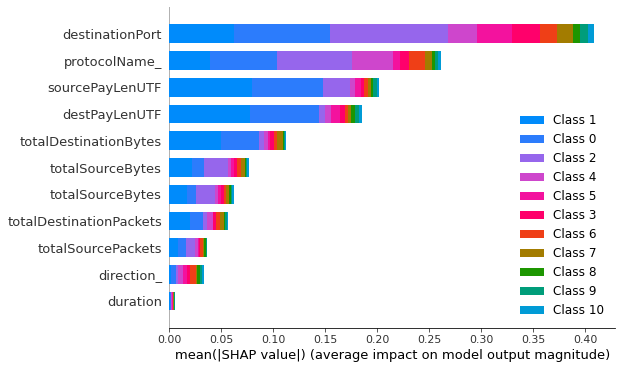

In [192]:
shap.summary_plot(shap_values, X_test, plot_type="bar")